In [3]:
import pandas as pd
from pandas import Series , DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from pandas.io.data import DataReader


/Users/chrislattanzio/anaconda3/lib/python3.5/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [6]:
from datetime import datetime

In [9]:
from __future__ import division

In [10]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [25]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)


In [26]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [30]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,104.509524,105.405635,103.591825,104.522024,3.961588e+07,103.252245
std,7.680692,7.631295,7.663630,7.651771,1.736386e+07,7.748492
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,89.394274
25%,97.295000,98.205000,96.542502,97.137499,2.767458e+07,95.808918
50%,105.494999,106.279999,104.794998,105.694999,3.446750e+07,104.112977
75%,109.982498,111.007501,109.064997,110.007498,4.637558e+07,108.974075
max,119.269997,119.860001,117.919998,119.029999,1.333697e+08,117.645979


In [31]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-11-23 to 2016-11-21
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


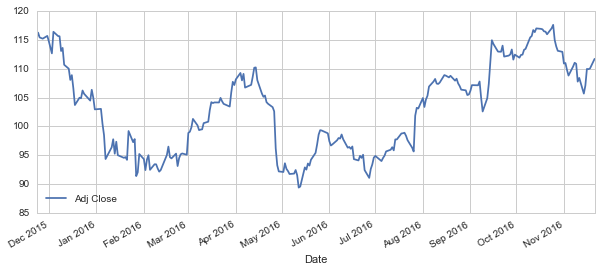

In [33]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

In [43]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = Series.rolling(AAPL['Adj Close'],window=ma).mean()


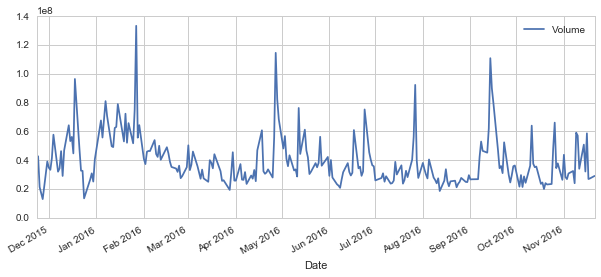

In [44]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

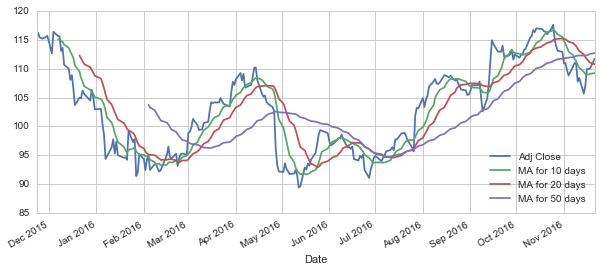

In [45]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

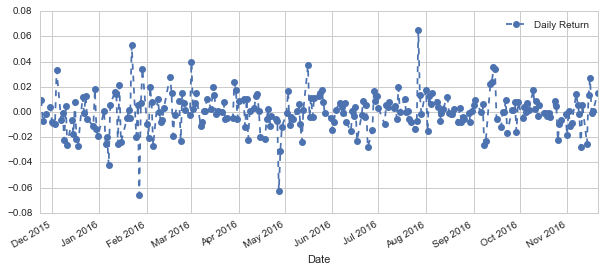

In [49]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

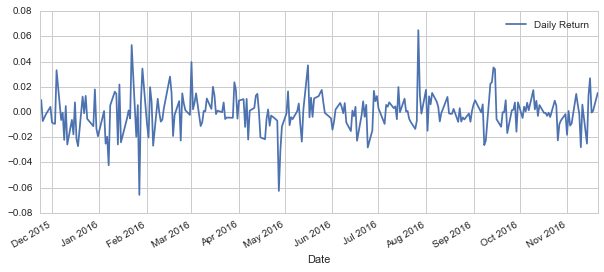

In [50]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True)

/Users/chrislattanzio/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


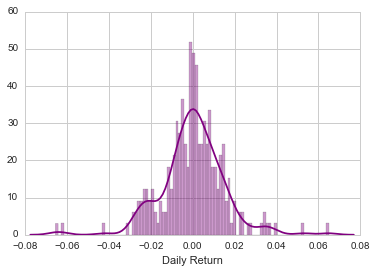

In [51]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

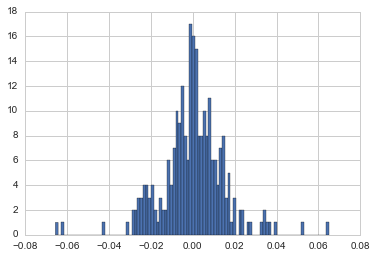

In [52]:
AAPL['Daily Return'].hist(bins=100)

In [53]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [54]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-11-23,115.187179,678.989990,755.979980,52.742727
2015-11-24,116.292582,671.150024,748.280029,52.801126
2015-11-25,115.461084,675.340027,748.150024,52.256081
2015-11-27,115.245871,673.260010,750.260010,52.489673
2015-11-30,115.725211,664.799988,742.599976,52.898454


In [56]:
tech_rets = closing_df.pct_change()

In [57]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-11-23,NaN,NaN,NaN,NaN
2015-11-24,0.009597,-0.011547,-0.010185,0.001107
2015-11-25,-0.007150,0.006243,-0.000174,-0.010323
2015-11-27,-0.001864,-0.003080,0.002820,0.004470
2015-11-30,0.004159,-0.012566,-0.010210,0.007788


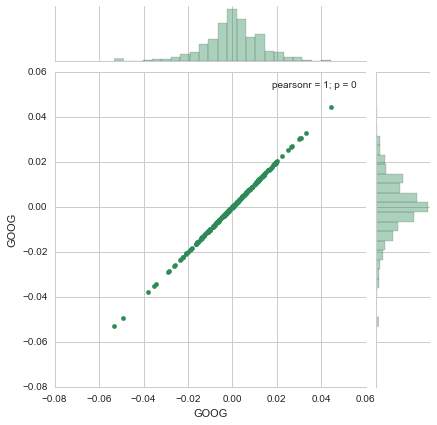

In [60]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color='seagreen')

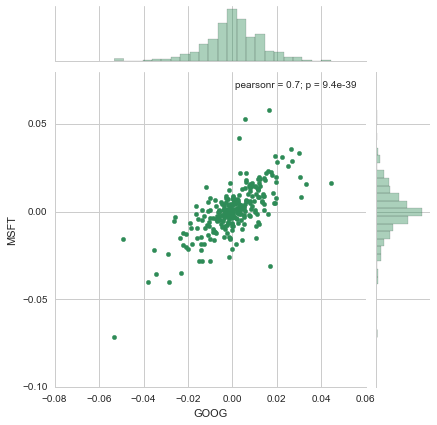

In [61]:
sns.jointplot('GOOG','MSFT',tech_rets,kind = 'scatter',color='seagreen')

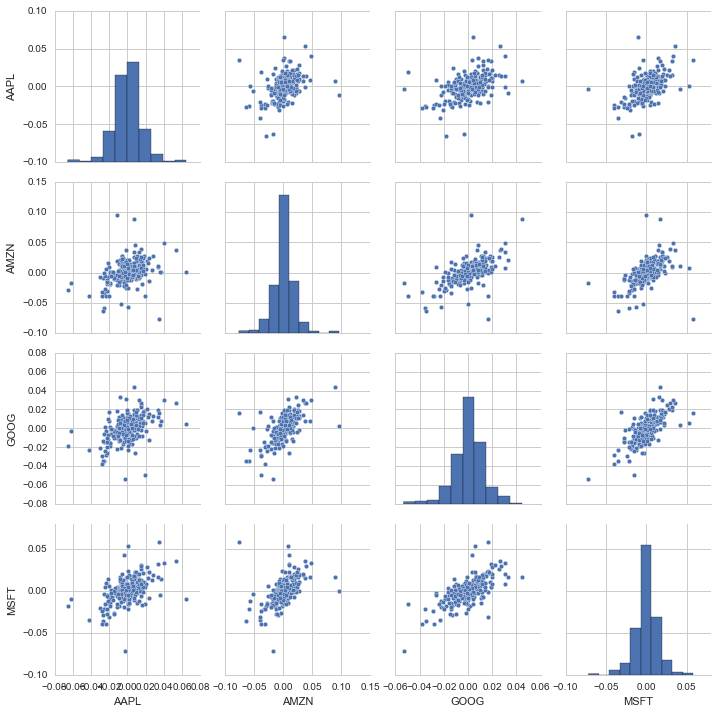

In [64]:
sns.pairplot(tech_rets.dropna())

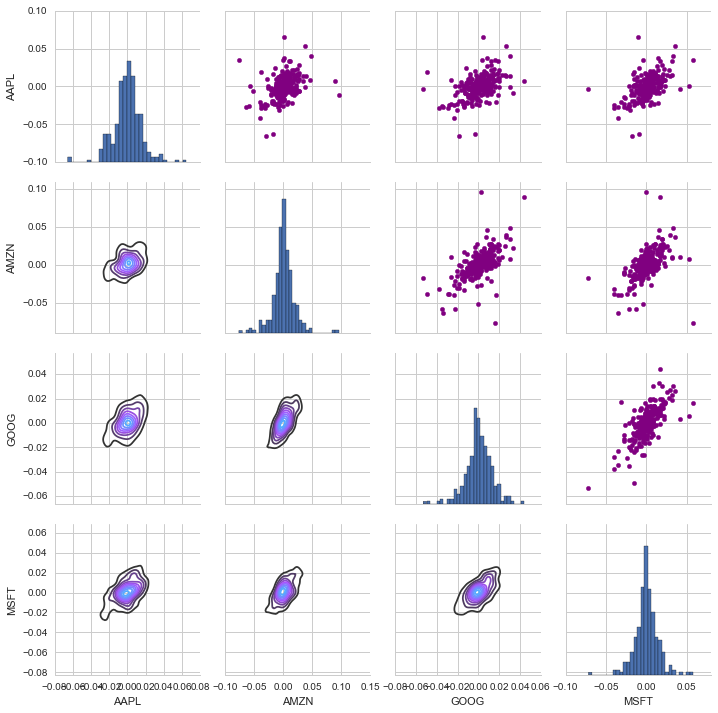

In [65]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

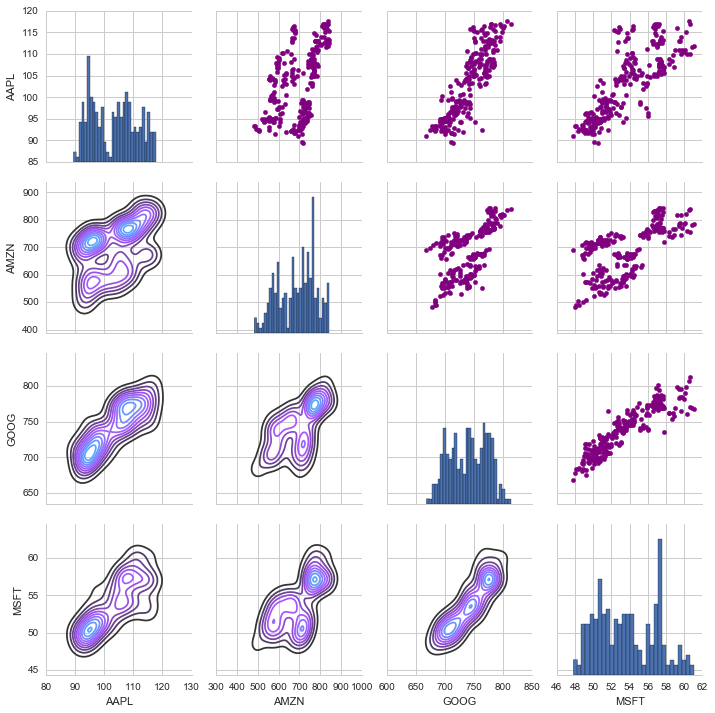

In [66]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

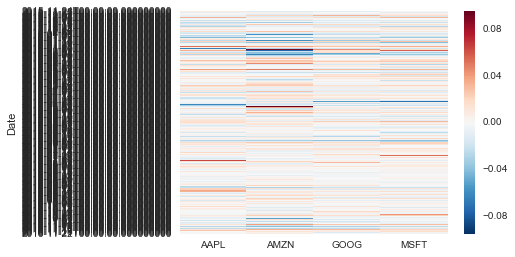

In [71]:
sns.heatmap(tech_rets.dropna())

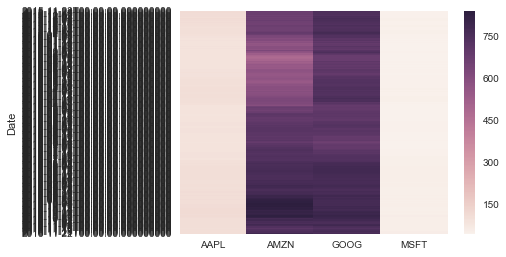

In [72]:
sns.heatmap(closing_df.dropna())

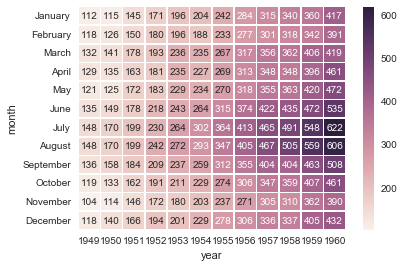

In [73]:
# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5)